In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
import os
import pickle

print(np.__version__)
print(cv2.__version__)
print(cv2.__version__)

1.19.5
4.1.2
4.1.2


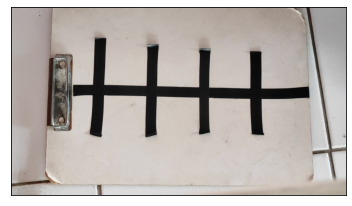

In [3]:
images = plt.imread('img/parking3_1.jpg')

plt.imshow(images)
plt.xticks([])
plt.yticks([])
plt.show()

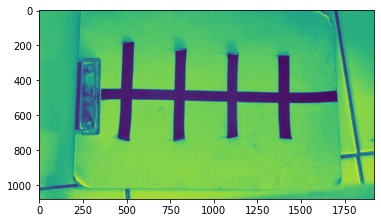

In [4]:
def to_gray(img):
  return cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

img_gray = to_gray(images)
plt.imshow(img_gray)
plt.show()

In [5]:
img_gray.shape

(1080, 1920)

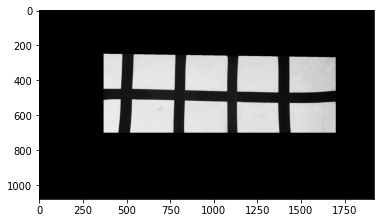

In [6]:
#w, h
def select_roi(img_gray):
  #if to detect/select area, adjust to parking 1d
  ROI1 = np.array([[(370, 250), (370, 700), (1700, 700), (1700, 270)]])
  #ROI5 = np.array([[(400,50), (400, 1080), (1600, 1040),(1920, 1000), (1920, 650),(1180, 0), (870, 0), (940, 170), (1189, 5), (1240, 50), (880, 250), (820, 50), (399, 230), (399, 150), (780, 20)]])
  #ROI4 = np.array([[(510, 30), (50, 1080), (1920, 1080), (1750, 650), (1300, 50), (1050, 50), (1050, 150), (1385, 150), (1410, 200), (1050, 200), (1080, 350),(990, 350),(970, 200),(430, 200),(430, 170),(990,170), (990, 50)]], dtype=np.int32)
  #ROI2 = np.array([[(340, 0), (0, 730),(0, 1080), (1920, 1080), (1920,850), (1400, 80), (1100, 50), (1250, 1080), (750, 1080), (750, 30)]], dtype=np.int32)
  #ROI = np.array([[(0, 90),(1280, 0), (1280, 720)]], dtype=np.int32)
  
  blank = np.zeros_like(img_gray)
  masking = cv2.fillPoly(blank, ROI1, 255)
  masked = cv2.bitwise_and(img_gray, masking)
  return masked

masked_img = select_roi(img_gray)
plt.imshow(masked_img, cmap = 'gray')

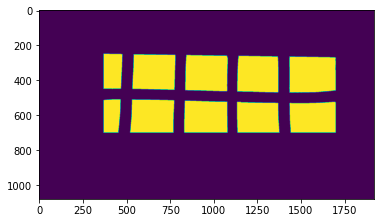

In [7]:
def to_treshold(img):
  _, thresh = cv2.threshold(img, 140, 255, cv2.THRESH_BINARY,cv2.THRESH_OTSU)
  return thresh

img_tresh = to_treshold(masked_img)
plt.imshow(img_tresh)
plt.show()

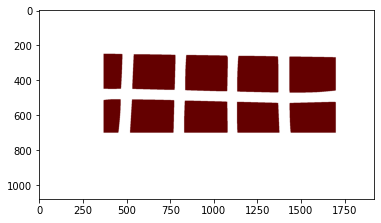

[(370, 510, 98, 191), (370, 250, 108, 201), (1136, 262, 236, 209), (1135, 525, 243, 176), (838, 257, 244, 207), (535, 253, 247, 203), (832, 518, 249, 183), (522, 511, 253, 190), (1436, 525, 265, 176), (1435, 266, 266, 206)]


In [8]:
#def detect_countour(img, treshold):
contours, hierarchy = cv2.findContours(img_tresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
mask = np.ones_like(images) * 255


box = []
for c in contours:
  if cv2.contourArea(c) > 100:
    hull = cv2.convexHull(c)
    #mask = cv2.dilate(mask, np.ones((40, 15), np.uint8))
    cv2.drawContours(mask, [hull], -1, 100, -1)
    x,y,z,a = cv2.boundingRect(c)
    box.append((x,y,z,a))

box = sorted(box, key=lambda box: box[2])
plt.imshow(mask)
plt.show()
print(box)
#detect = detect_countour(images, img_tresh)

(370, 510, 98, 191)
(370, 250, 108, 201)
(1136, 262, 236, 209)
(1135, 525, 243, 176)
(838, 257, 244, 207)
(535, 253, 247, 203)
(832, 518, 249, 183)
(522, 511, 253, 190)
(1436, 525, 265, 176)
(1435, 266, 266, 206)
[(370, 510, 98, 191), (370, 250, 108, 201), (1136, 262, 236, 209), (1135, 525, 243, 176), (838, 257, 244, 207), (535, 253, 247, 203), (832, 518, 249, 183), (522, 511, 253, 190), (1436, 525, 265, 176), (1435, 266, 266, 206)]


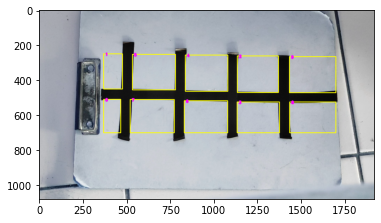

In [12]:
result = cv2.imread('img/parking3_1.jpg')

for i, boxs in enumerate(box):
  a,b,c,d = boxs 
  print(boxs)
  folder ='segmented1'
  cropted = result[b:b+d, a:a+c]
  img_name = 'img_1'+str(i+101)+'.jpg'
  #cv2.imwrite(os.path.join(folder, img_name), cropted)
  cv2.rectangle(result, (a,b), (a+c, b+d), (255, 255, 0), 3)
  cv2.putText(result, str(i), (a+10, b+10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255,0,255), 5, cv2.LINE_8)
plt.imshow(result)
print(box)

In [ ]:
# save file to zip

from zipfile import ZipFile

with ZipFile('segmentedvid.zip', 'w') as zip:
  for folder, subfolder, name in os.walk('segmented1'):
    for path in name:
      paths = os.path.join(folder, path)
      zip.write(paths, os.path.basename(paths))


In [13]:
import pickle

with open('spot1.pickle', 'wb') as data:
  pickle.dump(box, data, protocol=pickle.HIGHEST_PROTOCOL)